In [3]:
import numpy as np
from qutip import *
import pylab as plt
%matplotlib inline

In [182]:
N = 4                         # number of cavity fock states
wc = 1.0 * 2 * np.pi     # cavity and atom frequency
g = 20 * 2 * np.pi       # coupling strength
kappa = 20*2*np.pi     # cavity dissipation rate


gamma = 2*np.pi*1    # atom dissipation rate
gamma_r = 2*np.pi*0.5
gamma_d = 2*np.pi*0.5

delta = 6*kappa
wa = wc+delta
omega = 2*np.pi * 6
wl = wa                     # resonantly driven QD with Laser
deltawc = wc-wl
deltawa = wa-wl

In [183]:
# Jaynes-Cummings Hamiltonian
a  = tensor(qeye(N), destroy(2))
sm = tensor(destroy(N), qeye(2))

H = deltawc * a.dag() * a + deltawa * sm.dag() * sm + 1j * g * (a.dag() * sm - a * sm.dag()) + omega * (sm + sm.dag())

# collapse operators

n=0 #limit approximation
c_ops =[np.sqrt(2*kappa)*a,np.sqrt(2*gamma)*sm,np.sqrt(2*gamma_r*n)*spre(sm.dag())*spost(a),np.sqrt(2*gamma_r*(n+1))*spre(sm)*spost(a.dag()),np.sqrt(2*gamma_d)*spre(sm.dag())*spost(sm)]

In [184]:
H

Quantum object: dims = [[4, 2], [4, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[   0.00000000  +0.j            0.00000000  +0.j           37.69911184  +0.j
     0.00000000  +0.j            0.00000000  +0.j            0.00000000  +0.j
     0.00000000  +0.j            0.00000000  +0.j        ]
 [   0.00000000  +0.j         -753.98223686  +0.j
     0.00000000+125.66370614j   37.69911184  +0.j            0.00000000  +0.j
     0.00000000  +0.j            0.00000000  +0.j            0.00000000  +0.j        ]
 [  37.69911184  +0.j            0.00000000-125.66370614j
     0.00000000  +0.j            0.00000000  +0.j           53.31459526  +0.j
     0.00000000  +0.j            0.00000000  +0.j            0.00000000  +0.j        ]
 [   0.00000000  +0.j           37.69911184  +0.j            0.00000000  +0.j
  -753.98223686  +0.j            0.00000000+177.71531753j
    53.31459526  +0.j            0.00000000  +0.j            0.00000000  +0.j        ]
 [   0.00000000  +0.j       

In [185]:
# calculate the power spectrum using spectrum, which internally uses essolve 
# to solve for the dynamics (by default)
#wlist2 = np.linspace(-5, 5, 200000) * 2 * np.pi
wlist2 = np.linspace(-8, 8, 200000) * kappa # AMCD
spec2 = spectrum(H, wlist2, c_ops, a.dag(), a)

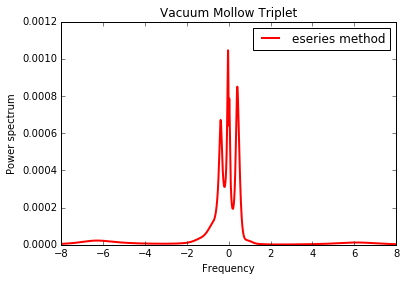

In [186]:
plt.plot((wlist2 ) / kappa, spec2, 'r', lw=2, label='eseries method')
plt.legend()
ax = plt.gca()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Mollow Triplet')
#ax.set_xlim(-wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))
#plt.show()